In [1]:
# -*- coding: utf-8 -*-
import gym
import numpy as np
import hiive.mdptoolbox
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import generate_random_map
import mod_FL as mod
import mod_MDP_OpenAI as mod_openai
import re
import gym
import numpy as np
import mod_FL as mod
from gym.envs.toy_text.frozen_lake import generate_random_map
import hiive

class OpenAI_MDPToolbox_mod:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self,  openAI_env_name:str,render:bool=False,size=4,seed=42,step_reward=-0.05,hole_reward=-1,slippery= True,**kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        np.random.seed(seed)
        self.map = generate_random_map(size=size)
        self.env = mod.mod_lake(step_reward=step_reward,hole_reward=hole_reward,desc=self.map,is_slippery=slippery)
        self.env.reset()

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob
def unpack_run_stat(run_stat):
    #print('yes')
    V_max = []
    V_mean = []
    Run_Time = []
    Reward = []
    Error = []
    #iter = [range(len(run_stat))]
    for i in range(len(run_stat)):
        #print(run_stat[i])
        V_max.append(run_stat[i]['Max V'])
        V_mean.append(run_stat[i]['Mean V'])
        Run_Time.append(run_stat[i]['Time'])
        Reward.append(run_stat[i]['Reward'])
        Error.append(run_stat[i]['Error'])


    return V_max, V_mean, Run_Time,Reward,Error


    
import os
def test_policy(vi,map):
    policy = vi.policy
    os.environ["SDL_VIDEODRIVER"] = "dummy"
    Time = []
    Success = 0
    Fail = 0
    goal = len(map)*len(map) - 1
    for seed in range(100):
        env = gym.make('FrozenLake-v1',desc=map,is_slippery=True) # try for different environments
        #env.np_random = np.random.seed(seed)
        observation = env.reset()
        #print(observation)
        for t in range(10000):
                #env._render_text()
                #print(observation)
                if t == 0 :
                    action = policy[observation[0]]
                else:
                    action = policy[observation]
                observation, reward, done, t,info=env.step(action)
                #print(observation, reward, done, t,info)
                if done:
                    #print("Finished after {} timesteps".format(t+1))
                    if observation == goal:
                        Success+=1
                        Time.append(t+1)
                        #print('Done Win')

                    else:
                        Fail+=1
                        #print('Done Loss')

                    break
    return Success

/home/sun/miniconda3/envs/playground/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [126]:
import os
def test_policy(vi,map):
    policy = vi.policy
    os.environ["SDL_VIDEODRIVER"] = "dummy"
    Time = []
    Success = 0
    Fail = 0
    goal = len(map)*len(map) - 1
    for seed in range(100):
        env = gym.make('FrozenLake-v1',desc=map,is_slippery=True) # try for different environments
        #env.np_random = np.random.seed(seed)
        observation = env.reset()
        #print(observation)
        for t in range(10000):
                #env._render_text()
                #print(observation)
                if t == 0 :
                    action = policy[observation[0]]
                else:
                    action = policy[observation]
                observation, reward, done, t,info=env.step(action)
                #print(observation, reward, done, t,info)
                if done:
                    #print("Finished after {} timesteps".format(t+1))
                    if observation == goal:
                        Success+=1
                        Time.append(t+1)
                        #print('Done Win')

                    else:
                        Fail+=1
                        #print('Done Loss')

                    break
    return Success

In [ ]:
X = np.reshape(vi.policy,(4,4))

fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize = (80,80))
ax.imshow(X,cmap='Accent')
map= OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=4,seed=42).map
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(20), labels=[i for i in range(4)])
ax.set_yticks(np.arange(20), labels=[i for i in range(4)])

arrow = ['←','↓','→','↑']
for i in range(4):
    for j in range(4):
        if map[i][j] == 'H':
            text = ax.text(j, i, 'X',fontsize=10,color='black')
        elif map[i][j] in 'S':
            text = ax.text(j, i, map[i][j]+arrow[X[i,j]],fontsize=10)
        elif map[i][j] in 'G':
            text = ax.text(j, i, 'G',fontsize=10)
        else:
            text = ax.text(j, i, arrow[X[i,j]],
                       ha="center", va="center", color="w")
plt.savefig('Figure_1.png')

In [ ]:
plt.plot(Error_V,label='Value Iteration')
plt.plot(Error_P,label='Policy Iteration')
plt.legend()
plt.title('Error of Utility/Policy Utility for Each Iteration(4*4 FL)')
plt.xlabel('Iteration')
#plt.xscale('log')
plt.ylabel('Utility Error(current iter vs last iter)')
plt.savefig('Figure_2.png')

In [33]:
#from test_env import TestEnv
size = 20
sr = -0.1/400
hr = -1
goal = size*size -1
slippery = True
FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=size,seed=42,step_reward=sr,hole_reward=hr,slippery=slippery)
map,P,R=FL_mod.map,FL_mod.P,FL_mod.R
#vi = hiive.mdptoolbox.mdp.PolicyIteration(P, R,0.999,max_iter=22,eval_type=0)
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R,0.999,max_iter=50000,epsilon=0.001)

vi.setVerbose()
vi.run()
V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(vi.run_stats)
#vi.error()


 Iteration   Variation
         1    0.666750
         2    0.333166
         3    0.184935
         4    0.135528
         5    0.110852
         6    0.084794
         7    0.080612
         8    0.063720
         9    0.059065
        10    0.047903
        11    0.043639
        12    0.036097
        13    0.032500
        14    0.027293
        15    0.024406
        16    0.020731
        17    0.018491
        18    0.015843
        19    0.014419
        20    0.013940
        21    0.013615
        22    0.013377
        23    0.013052
        24    0.012796
        25    0.012478
        26    0.012226
        27    0.012072
        28    0.011848
        29    0.011669
        30    0.011438
        31    0.011244
        32    0.011012
        33    0.010833
        34    0.010684
        35    0.010503
        36    0.010340
        37    0.010153
        38    0.009983
        39    0.009793
        40    0.009623
        41    0.009437
        42    0.009268
        43 

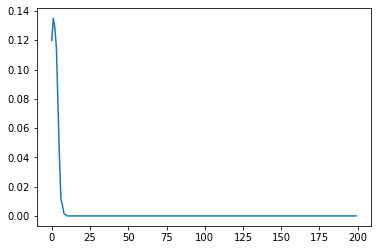

In [22]:
plt.plot(Error)

In [135]:
p_policy= vi.policy

In [138]:
v_policy= vi.policy

In [141]:
compare=np.asarray(p_policy) - np.asarray(v_policy)

In [9]:

V_max_P, V_mean_P, Run_Time_P, Reward_P,Error_P = unpack_run_stat(vi.run_stats)

In [11]:
V_max_V, V_mean_V, Run_Time_V, Reward_V,Error_V = unpack_run_stat(vi.run_stats)


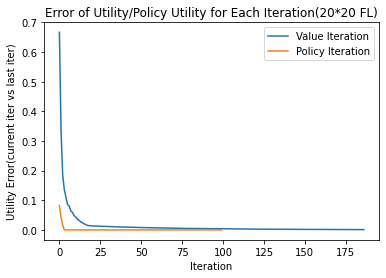

In [13]:
plt.plot(Error_V,label='Value Iteration')
plt.plot(Error_P,label='Policy Iteration')
plt.legend()
plt.title('Error of Utility/Policy Utility for Each Iteration(20*20 FL)')
plt.xlabel('Iteration')
#plt.xscale('log')
plt.ylabel('Utility Error(current iter vs last iter)')
plt.savefig('Figure_5.png')

In [81]:
vi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 0.4202188474804716,
  'Error': 0.049209804438030094,
  'Time': 0.00038695335388183594,
  'V[0]': -0.23838655466583514,
  'Max V': 0.4202188474804716,
  'Mean V': -0.07428116223664852,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.43168200970395354,
  'Error': 2.7755575615628914e-17,
  'Time': 0.0006875991821289062,
  'V[0]': -0.2123285923267718,
  'Max V': 0.43168200970395354,
  'Mean V': -0.05338156533309793,
  'Iteration': 2}]

In [24]:
##(int(s), r, t, False, {"prob": p})
'''
from test_env import TestEnv
sr = -0.001
hr = -1
size = 16
goal = size*size -1
slippery = 
FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=size,seed=42,step_reward=sr,hole_reward=hr,slippery=slippery)
map,P,R=FL_mod.map,FL_mod.P,FL_mod.R
vi = hiive.mdptoolbox.mdp.PolicyIteration(P, R,0.99,max_iter=10000,eval_type = 1)
vi.run()
'''
policy = vi.policy
import gym
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
Time = []
Success = 0
Fail = 0
for seed in [i for i in range(100)]:
    env = gym.make('FrozenLake-v1',desc=map,is_slippery=slippery) # try for different environments
    #env.np_random = np.random.seed(seed)
    observation = env.reset()
    print(observation)
    for t in range(10000):
            #env._render_text()
            #print(observation)
            if t == 0 :
                action = policy[observation[0]]
            else:
                action = policy[observation]
            observation, reward, done, t,info=env.step(action)
            print(observation, reward, done, t,info)
            if done:
                print("Finished after {} timesteps".format(t+1))
                if observation == goal:
                    Success+=1
                    Time.append(t+1)
                    print('Done Win')

                else:
                    Fail+=1
                    print('Done Loss')
                    
                break
print(Success)

(0, {'prob': 1})
0 0.0 False False {'prob': 0.3333333333333333}
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
0 0.0 False False {'prob': 0.3333333333333333}
0 0.0 False False {'prob': 0.3333333333333333}
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
0 0.0 False False {'prob': 0.3333333333333333}
1 0.0 True False {'prob': 0.3333333333333333}
Finished after 1 timesteps
Done Loss
(0, {'prob': 1})
0 0.0 False False {'prob': 0.3333333333333333}
0 0.0 False False {'prob': 0.3333333333333333}
0 0.0 False False {'prob': 0.3333333333333333}
1 0.0 True False {'prob': 0.3333333333333333}
Finished

In [69]:
print(vi.policy)

(0, 0, 2, 3, 1, 1, 0, 0, 3, 2, 0, 0, 0, 2, 1, 0)


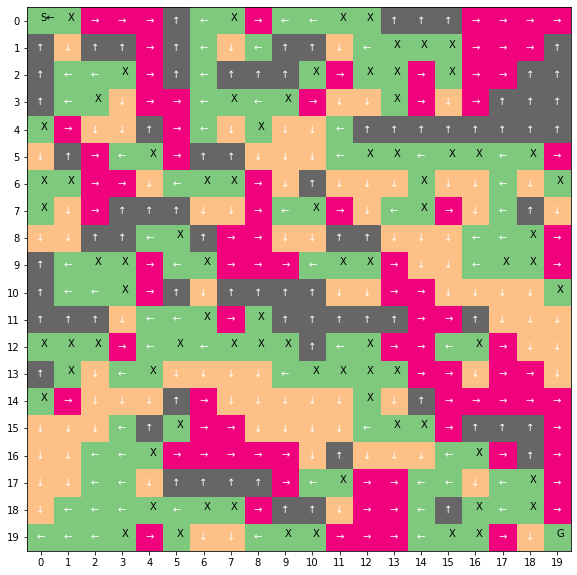

In [32]:
X = np.reshape(vi.policy,(20,20))

fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize = (80,80))
ax.imshow(X,cmap='Accent')
map= OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42).map
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(20), labels=[i for i in range(20)])
ax.set_yticks(np.arange(20), labels=[i for i in range(20)])

arrow = ['←','↓','→','↑']
for i in range(20):
    for j in range(20):
        if map[i][j] == 'H':
            text = ax.text(j, i, 'X',fontsize=10,color='black')
        elif map[i][j] in 'S':
            text = ax.text(j, i, map[i][j]+arrow[X[i,j]],fontsize=10)
        elif map[i][j] in 'G':
            text = ax.text(j, i, 'G',fontsize=10)
        else:
            text = ax.text(j, i, arrow[X[i,j]],
                       ha="center", va="center", color="w")
plt.savefig('Figure_4.png')

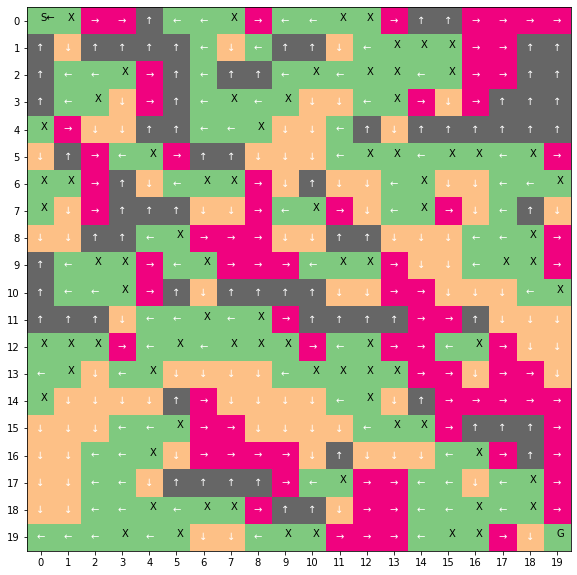

In [196]:
X = np.reshape(vi.policy,(20,20))

fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize = (80,80))
ax.imshow(X,cmap='Accent')
map= OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42).map
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(20), labels=[i for i in range(20)])
ax.set_yticks(np.arange(20), labels=[i for i in range(20)])

arrow = ['←','↓','→','↑']
for i in range(20):
    for j in range(20):
        if map[i][j] == 'H':
            text = ax.text(j, i, 'X',fontsize=10,color='black')
        elif map[i][j] in 'S':
            text = ax.text(j, i, map[i][j]+arrow[X[i,j]],fontsize=10)
        elif map[i][j] in 'G':
            text = ax.text(j, i, 'G',fontsize=10)
        else:
            text = ax.text(j, i, arrow[X[i,j]],
                       ha="center", va="center", color="w")
#plt.savefig('Figure_3.png')


0
0
21
18
21


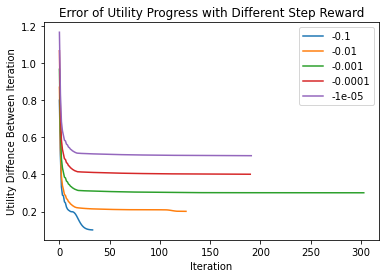

In [50]:

offset=0.1
for sr in [-0.1,-0.01,-0.001,-0.0001,-0.00001]:
    FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42,step_reward=sr,hole_reward=hr,slippery=slippery)
    map,P,R=FL_mod.map,FL_mod.P,FL_mod.R
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R,gamma=0.999,max_iter=1000,epsilon=0.001)
    vi.run()
    v_stat = vi.run_stats
    
    V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(v_stat)
    #plt.plot(np.asarray(V_max)/np.asarray(V_mean),label=str(gamma))
    plt.plot(np.asarray(Error)+offset,label=str(sr))
    offset+=0.1
    print(test_policy(vi,map))
plt.legend()
plt.title('Error of Utility Progress with Different Step Reward')
plt.xlabel('Iteration')
plt.ylabel('Utility Diffence Between Iteration')
plt.savefig('Figure_6.png')

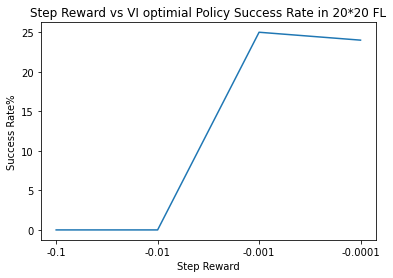

In [49]:
plt.plot([0,1,2,3],[0,0,25,24])
plt.xticks([0,1,2,3],[-0.1,-0.01,-0.001,-0.0001])
plt.ylabel('Success Rate%')
plt.xlabel('Step Reward')
plt.title('Step Reward vs VI optimial Policy Success Rate in 20*20 FL')
plt.savefig('Figure_7.png')

0
5
6
13
27
20


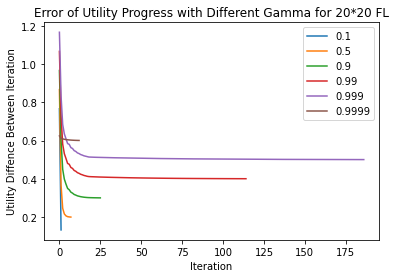

In [54]:
offset=0.1
sr = -0.1/400
for gamma in [0.1,0.5,0.9,0.99,0.999,0.9999]:
    FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42,step_reward=sr,hole_reward=hr,slippery=slippery)
    map,P,R=FL_mod.map,FL_mod.P,FL_mod.R
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R,gamma=gamma,max_iter=10000,epsilon=0.001)
    vi.run()
    v_stat = vi.run_stats
    
    V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(v_stat)
    #plt.plot(np.asarray(V_max)/np.asarray(V_mean),label=str(gamma))
    plt.plot(np.asarray(Error)+offset,label=str(gamma))
    offset+=0.1
    print(test_policy(vi,map))
plt.legend()
plt.title('Error of Utility Progress with Different Gamma for 20*20 FL')
plt.xlabel('Iteration')
plt.ylabel('Utility Diffence Between Iteration')
plt.savefig('Figure_8.png')

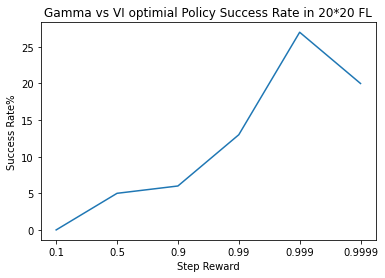

In [58]:
plt.plot([0,1,2,3,4,5],[0,5,6,13,27,20])
plt.xticks([0,1,2,3,4,5],[0.1,0.5,0.9,0.99,0.999,0.9999])
plt.ylabel('Success Rate%')
plt.xlabel('Step Reward')
plt.title('Gamma vs VI optimial Policy Success Rate in 20*20 FL')
plt.savefig('Figure_9.png')

In [2]:
sr = -0.1/400
hr = -1
FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42,step_reward=sr,hole_reward=hr,slippery=True,)
#map = FL_mod.map
P,R,map = FL_mod.P,FL_mod.R,FL_mod.map
test_list = []
ql = hiive.mdptoolbox.mdp.QLearning(P, R,0.999,n_iter=100000,alpha_decay=0.999999,epsilon_decay=0.99999,)
ql.run()
test = test_policy(ql,map)
test_list.append(test)
print(test)
while test<24:
    ql.run()
    test = test_policy(ql,map)
    test_list.append(test)
    print(test)

1
1
1
0
2
3
4
1
1
8
6
9
10
11
1
1
9
13
9
10
9
4
8
6
5
5
3
1
13
9
11
4
11
10
11
12
14
7
11
15
10
14
11
8
18
9
6
11
3
8
6
6
7
5
4
13
9
13
14
6
13
20
14
13
16
3
6
8
11
9
11
6
8
11
13
6
16
7
11
5
9
7
13
10
13
9
18
9
6
6
4
12
14
11
11
9
15
12
5
7
13
12
5
10
4
14
4
15
11
12
12
13
8
7
13
26


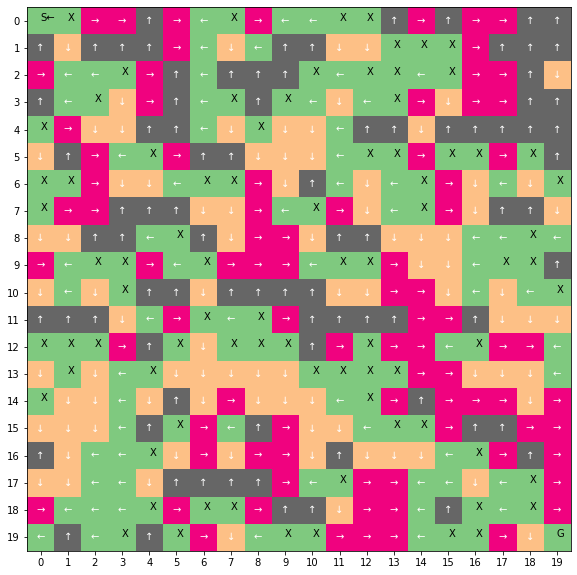

In [32]:
X = np.reshape(ql.policy,(20,20))

fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize = (80,80))
ax.imshow(X,cmap='Accent')
map= OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=20,seed=42).map
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(20), labels=[i for i in range(20)])
ax.set_yticks(np.arange(20), labels=[i for i in range(20)])

arrow = ['←','↓','→','↑']
for i in range(20):
    for j in range(20):
        if map[i][j] == 'H':
            text = ax.text(j, i, 'X',fontsize=10,color='black')
        elif map[i][j] in 'S':
            text = ax.text(j, i, map[i][j]+arrow[X[i,j]],fontsize=10)
        elif map[i][j] in 'G':
            text = ax.text(j, i, 'G',fontsize=10)
        else:
            text = ax.text(j, i, arrow[X[i,j]],
                       ha="center", va="center", color="w")
plt.savefig('Figure_11.png')

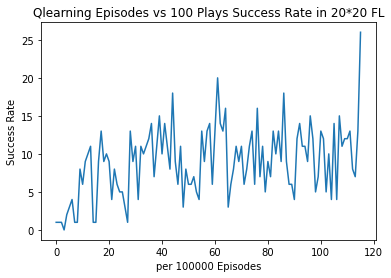

In [31]:
plt.plot(test_list)
plt.ylabel('Success Rate')
plt.xlabel('per 100000 Episodes')
plt.title('Qlearning Episodes vs 100 Plays Success Rate in 20*20 FL')
plt.savefig('Figure_10.png')

In [48]:
sr = -0.1
hr = -1
FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=4,seed=42,step_reward=sr,hole_reward=hr,slippery=True,)
P,R,map = FL_mod.P,FL_mod.R,FL_mod.map
ql = hiive.mdptoolbox.mdp.QLearning(P, R,0.9,n_iter=10000,)
ql.run()
V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(ql.run_stats)
Reward_list = []
Reward_list = Reward
test = test_policy(ql,map)
test_list.append(test)
print(test)
while test!=100:
    ql.run()
    test = test_policy(ql,map)
    V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(ql.run_stats)
    Reward_list = np.concatenate((np.asarray(Reward_list),np.asarray(Reward_list)),axis=None)
    test_list.append(test)
    print(test)

0
0
10
21
35
31
47
0
29
42
6
22
16
43
59
88
16
100


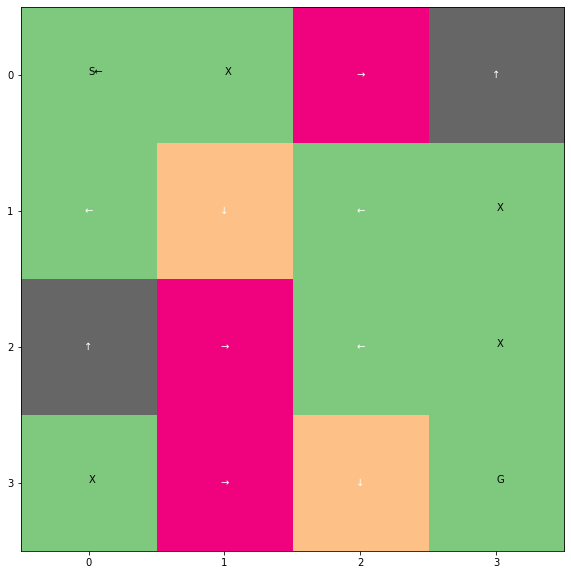

In [36]:
X = np.reshape(ql_4 .policy,(4,4))

fig, ax = plt.subplots(figsize=(10,10))
#plt.figure(figsize = (80,80))
ax.imshow(X,cmap='Accent')
map= OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=4,seed=42).map
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(4), labels=[i for i in range(4)])
ax.set_yticks(np.arange(4), labels=[i for i in range(4)])

arrow = ['←','↓','→','↑']
for i in range(4):
    for j in range(4):
        if map[i][j] == 'H':
            text = ax.text(j, i, 'X',fontsize=10,color='black')
        elif map[i][j] in 'S':
            text = ax.text(j, i, map[i][j]+arrow[X[i,j]],fontsize=10)
        elif map[i][j] in 'G':
            text = ax.text(j, i, 'G',fontsize=10)
        else:
            text = ax.text(j, i, arrow[X[i,j]],
                       ha="center", va="center", color="w")
plt.savefig('Figure_12.png')

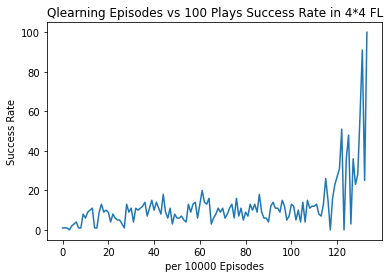

In [37]:
plt.plot(test_list)
plt.ylabel('Success Rate')
plt.xlabel('per 10000 Episodes')
plt.title('Qlearning Episodes vs 100 Plays Success Rate in 4*4 FL')
plt.savefig('Figure_12.png')

In [51]:
ql = hiive.mdptoolbox.mdp.QLearning(P, R,0.9,n_iter=10000,epsilon=0.1)

False
100
False
100
False
100
False
100
False
100
False
100
False
100
False
100
False
100


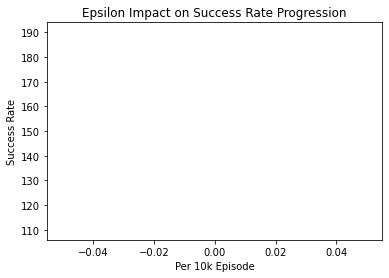

In [56]:
offset=0
sr = -0.1/400
hr = -1
for epsilon in [0.1]:
    FL_mod = OpenAI_MDPToolbox_mod(openAI_env_name='mod',size=4,seed=42,step_reward=sr,hole_reward=hr,slippery=True)
    map,P,R=FL_mod.map,FL_mod.P,FL_mod.R
    ql = hiive.mdptoolbox.mdp.QLearning(P, R,0.9,n_iter=10000,epsilon=epsilon)
    ql.run()
    #V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(ql.run_stats)
    test_list = []
    test = test_policy(ql,map)
    test_list.append(test)
    #print(test!=100)
    while test!=100:
        ql.run()
        print(test)
        test = test_policy(ql,map)
        #V_max, V_mean, Run_Time, Reward,Error = unpack_run_stat(ql.run_stats)
        #Reward_list = np.concatenate((np.asarray(Reward_list),np.asarray(Reward_list)),axis=None)
        test_list.append(test)

    offset+=10
    plt.plot(np.asarray(test_list)+offset,label=str(epsilon))
    print(test_policy(ql,map))
#plt.legend()
plt.title('Epsilon Impact on Success Rate Progression')
plt.xlabel('Per 10k Episode')
plt.ylabel('Success Rate')
plt.savefig('Figure_13.png')